![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [1]:
# Re-run this cell 
import pandas as pd

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()


,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


# Business Understating

This project its about tree questions about the SAT exam. Its necessary to check this thing below: 
- Which NYC schools have the best math results?
- What are the top 10 performing schools based on the combined SAT scores?
- Which single borough has the largest standard deviation in the combined SAT score?
After answer this questions, its important to come together the information in a only one dataframe with this lines: 
- `"borough"` - the name of the NYC borough with the largest standard deviation of `"total_SAT"`.
- `"num_schools"` - the number of schools in the borough.
- `"average_SAT"` - the mean of `"total_SAT"`.
- `"std_SAT"` - the standard deviation of `"total_SAT"`.

# Data Understanding

In [2]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


In [3]:
schools.shape

(375, 7)

In [4]:
schools.columns

Index(['school_name', 'borough', 'building_code', 'average_math',
       'average_reading', 'average_writing', 'percent_tested'],
      dtype='object')

# Data Preparaton 

## Bests results in Math

In [5]:
schools['average_math'].max()

754

In [6]:
best_math_schools = schools[schools['average_math'] > 640][['school_name', 'average_math']]

In [7]:
best_math_schools.head()

,school_name,average_math
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641
68,"High School for Mathematics, Science, and Engi...",683
88,Stuyvesant High School,754
93,Staten Island Technical High School,711


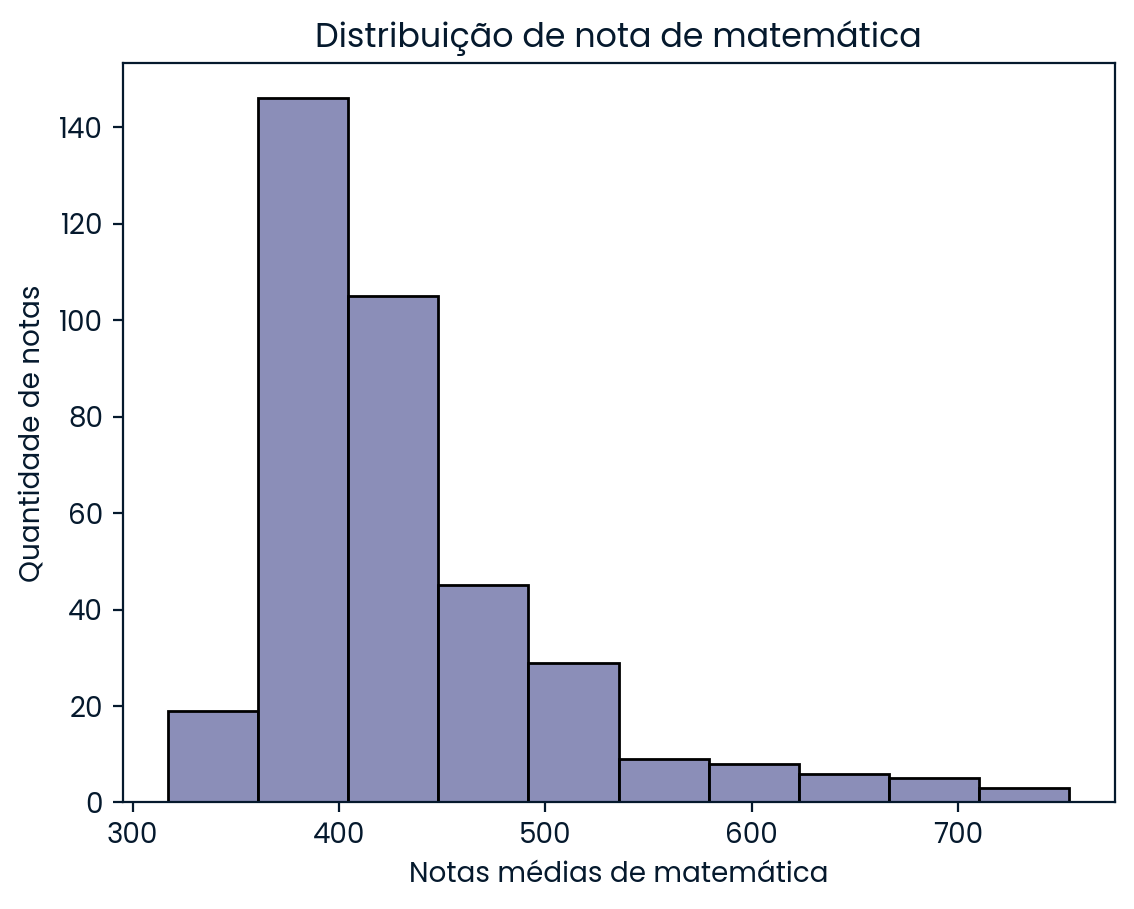

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.histplot(schools['average_math'], bins=10)
plt.xlabel("Notas médias de matemática")
plt.ylabel("Quantidade de notas")
plt.title("Distribuição de nota de matemática")
plt.show()

In [9]:
best_math_schools = best_math_schools.sort_values(['average_math'], ascending=False)
best_math_schools.head()

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683


## Top 10 performing schools 

In [10]:
schools.columns

Index(['school_name', 'borough', 'building_code', 'average_math',
       'average_reading', 'average_writing', 'percent_tested'],
      dtype='object')

In [11]:
schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN,1859
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197


In [12]:
top_10_schools = schools[['school_name', 'total_SAT']].sort_values(by='total_SAT', ascending=False).head(10)
top_10_schools.head(10)

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


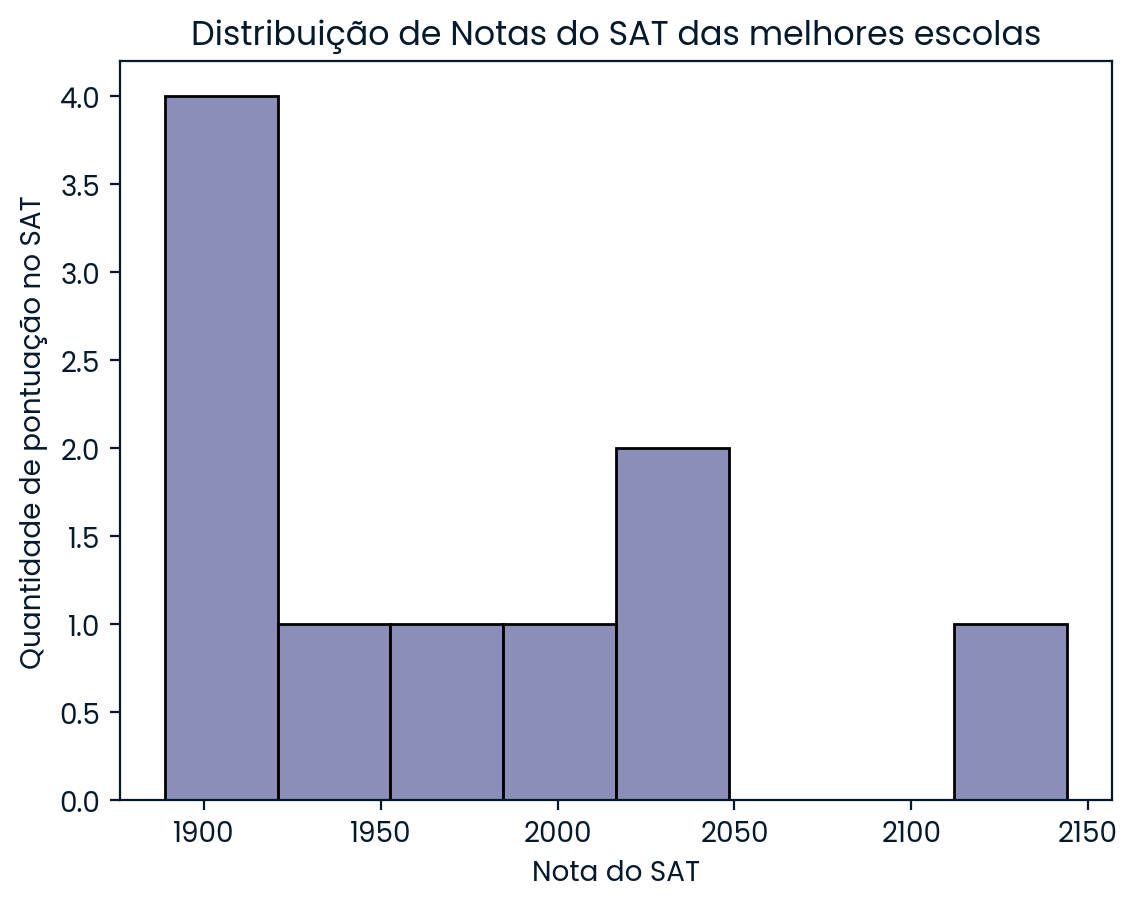

In [13]:
sns.histplot(top_10_schools['total_SAT'], bins= 8)
plt.ylabel("Quantidade de pontuação no SAT")
plt.xlabel("Nota do SAT")
plt.title("Distribuição de Notas do SAT das melhores escolas")
plt.show()

## Deviation of total_SAT by borought

In [14]:
schools.columns

Index(['school_name', 'borough', 'building_code', 'average_math',
       'average_reading', 'average_writing', 'percent_tested', 'total_SAT'],
      dtype='object')

In [15]:
import numpy as np
std_dev = schools.groupby('borough')['total_SAT'].agg(['count',np.mean,np.std]).round(2)
print(std_dev)

               count     mean     std
borough                              
Bronx             98  1202.72  150.39
Brooklyn         109  1230.26  154.87
Manhattan         89  1340.13  230.29
Queens            69  1345.48  195.25
Staten Island     10  1439.00  222.30


## Criando um dataframe

In [16]:
# Encontrar o maior bairro com o maior desvio padrão 
max_std_borough = std_dev.loc[std_dev['std'].idxmax()].name
num_schools = schools[schools['borough'] == max_std_borough].shape[0]
average_sat = schools[schools['borough'] == max_std_borough]['total_SAT'].mean().round(2)
std_SAT = schools[schools['borough'] == max_std_borough]['total_SAT'].std().round(2)

largest_std_dev = pd.DataFrame ({ 
    "borough" : [max_std_borough], 
    "num_schools" : [num_schools], 
    "average_SAT" : [average_sat],
    "std_SAT" : [std_SAT]
})

print(largest_std_dev)

     borough  num_schools  average_SAT  std_SAT
0  Manhattan           89      1340.13   230.29
